# 머신러닝 회귀모델 실습

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## 데이터 로딩 및 단위 변경

In [5]:
# read weight-height dataset
data = "datas_ml/weight-height.csv"
wh_df = pd.read_csv(data)

In [6]:
wh_df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [7]:
# read weight-height dataset
data = "datas_ml/weight-height.csv"
wh_df = pd.read_csv(data)

# 키 변경하기
wh_df["Height"] = wh_df["Height"]*2.54

# 몸무게 변경하기
wh_df["Weight"] = wh_df["Weight"]*0.453592

wh_df.head()

,Gender,Height,Weight
0,Male,187.571423,109.720985
1,Male,174.706036,73.622732
2,Male,188.239668,96.497550
3,Male,182.196685,99.809504
4,Male,177.499761,93.598619


In [9]:
wh_df.shape

(10000, 3)

## 데이터 탐색

In [10]:
wh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [11]:
wh_df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,168.573602,73.228054
std,9.772721,14.564131
min,137.828359,29.347460
25%,161.304276,61.605982
50%,168.447898,73.124894
75%,175.702625,84.898599
max,200.656806,122.465167


In [12]:
wh_df['Gender'].describe()

count     10000
unique        2
top        Male
freq       5000
Name: Gender, dtype: object

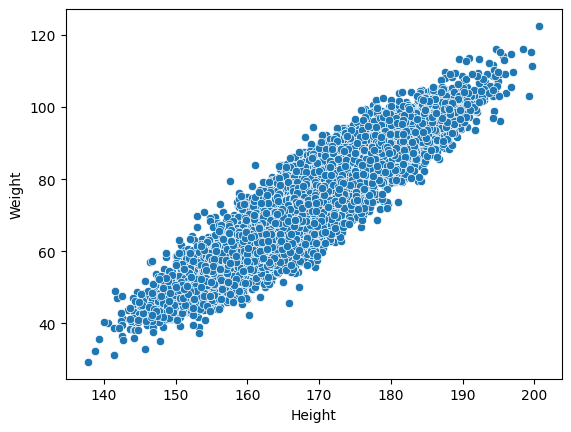

In [13]:
# 키와 몸무게 분포 확인
sns.scatterplot(data=wh_df, x = 'Height', y = 'Weight')
plt.show()

# 키에 따른 몸무게 예측

## 학습, 테스트 데이터 준ql

In [14]:
x = wh_df['Height']
y = wh_df['Weight']

In [15]:
y[:5]

0    109.720985
1     73.622732
2     96.497550
3     99.809504
4     93.598619
Name: Weight, dtype: float64

80%는 트레이닝 데이터, 20%는 테스트 데이터로 나누기

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

## 회귀 모델 학습하기
- 선형회귀(LinearRegression)

In [19]:
model_lr = LinearRegression()

In [20]:
x_train.shape

(8000,)

In [16]:
# x_train 데이터가 1D 이면 오류 발생함
# model_lr.fit(x_train, y_train)

In [21]:
x_train.shape

(8000,)

In [22]:

# x는 2차원이어야 함.
x_train_2d = x_train.values.reshape(-1,1)

In [23]:
# 모델 학습
# model_lr.fit(x_train, y_train)  <-- x_train은 2D 여야함.
model_lr.fit(x_train_2d, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
# 회귀선 기울기 확인(w)
model_lr.coef_

array([1.37825477])

In [25]:
# 회귀선의 절편(b)
model_lr.intercept_

np.float64(-159.16696134875212)

## 학습 모델 테스트

In [26]:
#print(type(x_test))
print("테스트 데이터", x_test.values)
print()
print(x_train_2d)

테스트 데이터 [173.53649028 164.22298414 188.04787828 ... 171.59270539 162.35978704
 158.54282215]

[[158.38424815]
 [150.90929264]
 [163.96639183]
 ...
 [172.08583788]
 [167.17562084]
 [174.96463993]]


In [27]:
# 테스트 데이터에 대한 예측을 수행
y_pred = model_lr.predict(x_test.values.reshape(-1,1))

In [25]:
y_pred

array([ 80.01053471,  67.17415041, 100.01092448, ...,  77.3315039 ,
        64.60619012,  59.34544004], shape=(2000,))

In [26]:
model_lr.coef_

array([1.37825477])

In [27]:
model_lr.intercept_

np.float64(-159.16696134875212)

## 모델 성능 평가하기

[] 회귀 모델의 성능 평가
- MSE(Mean Squared Error)를 측정하기
- RMSE(Root Mean Squared Error)를 측정하기

In [28]:
y_test[:5]

937     93.633249
9355    67.568114
2293    98.799503
192     92.485438
8675    57.775028
Name: Weight, dtype: float64

In [29]:
# MSE(Mean Squared Error)
MSE = mean_squared_error(y_test, y_pred)

# RMSE(Root Mean Squared Error)를 측정하기
RMSE = np.sqrt(MSE)

print('MSE :', MSE)
print('RMSE :', RMSE)

# 결과는 도메인마다 다름

MSE : 31.353712760195958
RMSE : 5.599438611164155


In [30]:
a = model_lr.coef_
b = model_lr.intercept_
# y_pred = a * x + b
y = a * 165 + b
y

array([68.24507623])

In [ ]:
my_data = 
y_pred2 = 
y_pred2

## 예측 결과 시각화

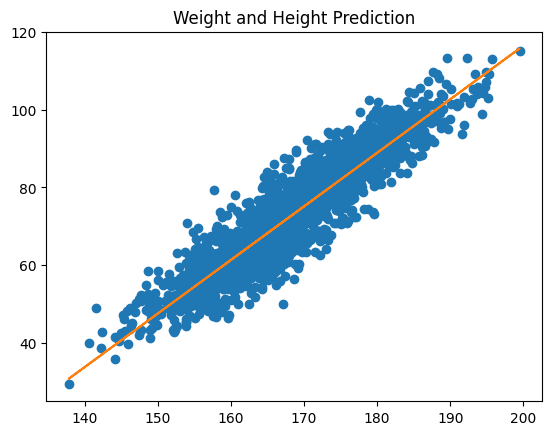

In [31]:
plt.plot(x_test, y_test, 'o')
plt.plot(x_test, y_pred)
plt.title('Weight and Height Prediction')
plt.show()

## 키와 성별에 따른 몸무게 예측하기

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [29]:
# read weight-height dataset
data = "datas_ml/weight-height.csv"
gwh_df = pd.read_csv(data)
gwh_df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [30]:
# 인치, 파운드 -> cm, kg으로 변환
gwh_df["Height"] = gwh_df["Height"] * 2.54
gwh_df["Weight"] = gwh_df["Weight"] * 0.4563
# read weight-height dataset
gwh_df.head()

,Gender,Height,Weight
0,Male,187.571423,110.376033
1,Male,174.706036,74.062269
2,Male,188.239668,97.073652
3,Male,182.196685,100.405379
4,Male,177.499761,94.157414


<Figure size 1000x600 with 0 Axes>

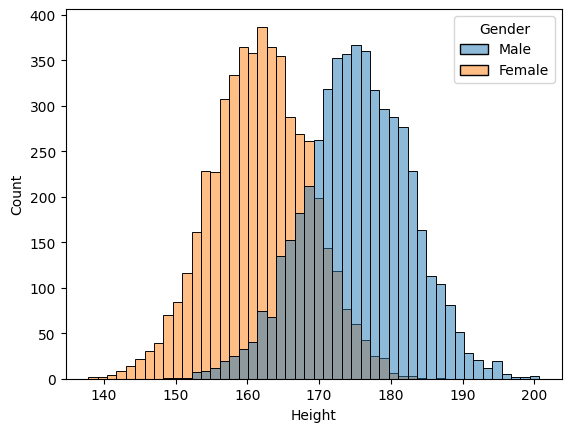

<Figure size 1000x600 with 0 Axes>

In [35]:
# feature distribution
sns.histplot(data=gwh_df, x="Height", hue="Gender")
plt.figure(figsize=(10,6))

## ML을 위한 feature Engineering

In [31]:
gwh_df['Gender'].value_counts()

Gender
Male      5000
Female    5000
Name: count, dtype: int64

In [32]:
# Gender 컬럼을 숫자로 변환
gwh_df['Gender'] = gwh_df['Gender'].map({"Male": 0, "Female": 1})
gwh_df.head()

,Gender,Height,Weight
0,0,187.571423,110.376033
1,0,174.706036,74.062269
2,0,188.239668,97.073652
3,0,182.196685,100.405379
4,0,177.499761,94.157414


## 학습, 테스트 데이터 준비

In [33]:
# X = Gender, Height
X = gwh_df.drop(columns='Weight')

# y = Weight
y = gwh_df['Weight']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [35]:
X.head()

,Gender,Height
0,0,187.571423
1,0,174.706036
2,0,188.239668
3,0,182.196685
4,0,177.499761


In [36]:
X_train

,Gender,Height
9254,1,155.934775
1561,0,189.731998
1670,0,174.009850
6087,1,167.125690
6669,1,170.590986
...,...,...
5734,1,160.908969
5191,1,149.508528
5390,1,163.386531
860,0,175.449210


## 회귀 모델 학습

In [37]:
# 학습모델 객체생성, 학습, 테스트
model_lr2 = LinearRegression()
model_lr2.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## 테스트 및 성능 평가

In [38]:
y_pred = model_lr2.predict(X_test)
y_pred

array([75.55642225, 84.77185534, 78.14549722, ..., 57.84501902,
       79.97209066, 48.15240468], shape=(2000,))

In [39]:
X_test.columns

Index(['Gender', 'Height'], dtype='object')

In [45]:
model_lr2.coef_,model_lr2.intercept_

(array([-8.82812893,  1.07304895]), np.float64(-102.82554612386367))

[문제해결] MSE, RMSE 구하기

In [40]:
# MSE(Mean Squared Error)를 측정하기
MSE = mean_squared_error(y_test, y_pred)

# RMSE(Root Mean Squared Error)를 측정하기
RMSE = np.sqrt(MSE)

print('MSE :', MSE)
print('RMSE :', RMSE)

MSE : 21.080039418120673
RMSE : 4.591300405998356


### ML 모델 일반화
- [문제해결] 키와, 성별 정보로 일반 데이터를 구성하여 예측하기

In [ ]:
X = gwh_df.drop(columns='Weight')

# y = Weight
y = gwh_df['Weight']

In [41]:
my_test = np.array([[1, 165]])
my_test

array([[  1, 165]])

In [42]:
model_lr2.predict(my_test)

c:\Users\Admin\miniconda3\envs\eda_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([65.39940251])

### 예측 결과 시각화

In [43]:
X_test[:5]

,Gender,Height
6252,1,174.465570
4684,0,174.826508
1731,0,168.651246
4742,0,182.700524
4521,0,170.288974


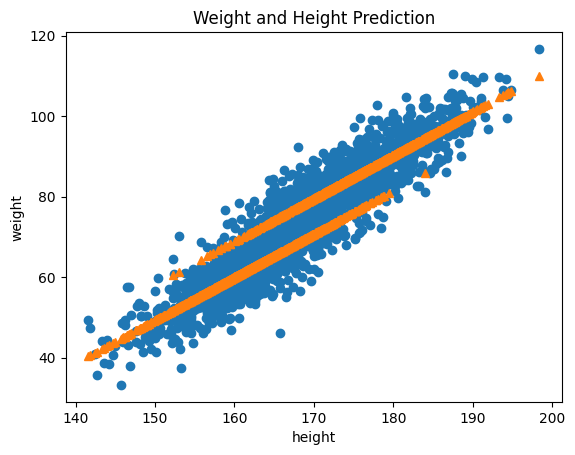

In [44]:
# 테스트 데이터(X)에 따른 실제 몸무게(y)와 예측 데이터(y^) 그래프 그리기
plt.plot(X_test.loc[:,'Height'], y_test, 'o')  # 실제값 표시
plt.plot(X_test.loc[:,'Height'], y_pred, '^')  # 예측값 표시
plt.title('Weight and Height Prediction')
plt.xlabel('height')
plt.ylabel('weight')
plt.show()